# Project 2: Netflix Data Analysis

In this project we will be working with a dataset of Netflix titles. We will be using its data to answer some questions about Netflix titles, directors, and countries using Pandas. We will also use Matplotlib to do a couple of interesting visualizations to get more interesting insights. The data is stored in a csv file named `netflix_titles.csv`.

Data extracted from: https://www.kaggle.com/datasets/shivamb/netflix-shows (with some cleaning and modifications).


### Project Tasks:

- `2.1.` Load the data using Pandas read_csv, use `show_id` as the index_col parameter.

- `2.2.` What is the min and max release years?  

- `2.3.` How many director names are missing values (NaN)?  

- `2.4.` How many different countries are there in the data?  

- `2.5.` How many characters long are on average the title names? (create a new column with the titles length if needed)  

- `2.6.` For a given year, make a pie chart of the number of movies and series combined made by every country, limit it to the top 10 countries.

- `2.7.` Make a line chart of the average duration of movies (not TV shows) in minutes for every year across all the years. (hint: you can create a new column with the integer value of the minutes and then use groupby year and then average on that minutes column)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Ex 2.1: Load the data using Pandas read_csv, use `show_id` as the index_col parameter. 

data_path = "../data/netflix_titles.csv"

movies_df = pd.read_csv(data_path)  # TODO

movies_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [3]:
# Ex 2.2: What is the min and max release years?

min_year = movies_df['release_year'].min()
max_year = movies_df['release_year'].max()

print(f"Min year: {min_year}, Max year: {max_year}")

Min year: 1925, Max year: 2021


In [4]:
# Ex 2.3: How many director names are missing values (NaN)?

num_missing_directors = movies_df['director'].isna().sum()

print(f"Number of missing directors: {num_missing_directors}")

Number of missing directors: 2634


In [5]:
# Ex 2.4: How many different countries are there in the data?

# You will need to fill the NaN (missing) values with the string "Unknown" first. 
# Then list the unique entries. As some of them are lists of countries already, because that movie/series was produced in multiple countries, 
# you will need to join with ", " all the elements of the list into a single string, and then split it by ", " to get a list of all the individual countries.

# Finally, you can get the number of unique countries by getting the length of the list of unique countries, you can use a set {} to get the unique countries or convert the entire
# list into a pd.Series and use .unique() to get the list of unique countries and then its number.





n_countries = movies_df['country'].fillna("Unknown").apply(lambda x: ", ".join(x) 
            if isinstance(x, list) 
            else x).str.split(", ").explode().nunique()

n_countries
print(f"There are {n_countries} different countries in the data")

There are 128 different countries in the data


In [6]:
# Ex 2.5: How many characters long are on average the title names?
 
# hint: (create a new column with the titles length if needed, you can use the apply method like .apply(lambda x: len(x)) , then get the mean of that column)

avg_title_length = int(movies_df['title'].apply(lambda x: len(x)).mean())





print(f"The average title length is {avg_title_length} characters")



The average title length is 17 characters


country
United States     43
India             20
United Kingdom    11
Germany            8
Japan              5
Australia          3
Turkey             3
Czech Republic     3
France             3
Taiwan             2
Canada             2
Lebanon            1
Sweden             1
Denmark            1
Netherlands        1
Egypt              1
Hong Kong          1
Romania            1
China              1
Indonesia          1
New Zealand        1
Thailand           1
Name: count, dtype: int64

country
United States     43
India             20
United Kingdom    11
Germany            8
Japan              5
Australia          3
Turkey             3
Czech Republic     3
France             3
Taiwan             2
Name: count, dtype: int64


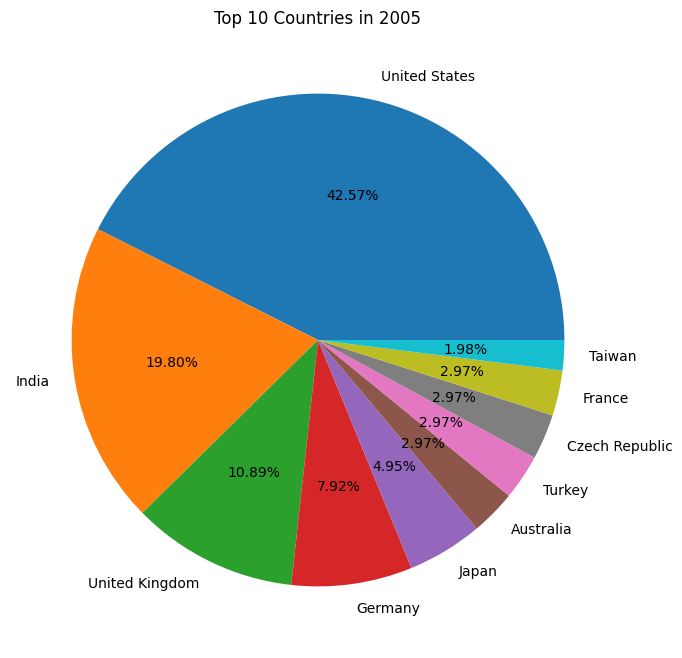

In [29]:
# Ex 2.6: For a given year, get the Pandas Series of how many movies and series combined were made by every country, limit it to the top 10 countries.

# It's optional to clean or modify the data of countries in this case, you can just use the data as it is.

# hint: (you can use the .loc method to filter the data by year, and then use the .value_counts() method to get the number of movies and series combined for each country, 
# finally use the head(10) method to get the top 10 countries)

   # you can try to change the year to see the results for different years 


year = 2005

filtered_by_year = movies_df.loc[movies_df['release_year'] == year]



separated_countries_by_year = filtered_by_year['country'].str.split(', ').explode()

country_counts = separated_countries_by_year.value_counts()

country_counts


top_10_countries =  country_counts.head(10) # TODO: top_10_countries has to be a Pandas Series with the top 10 countries with the number of movies and series combined for that year

print(top_10_countries)

# Code to plot the pie chart from your data results
fig = plt.figure(figsize=(8, 8))
plt.pie(top_10_countries, labels=top_10_countries.index, autopct="%.2f%%")
plt.title(f"Top 10 Countries in {year}")

plt.show()




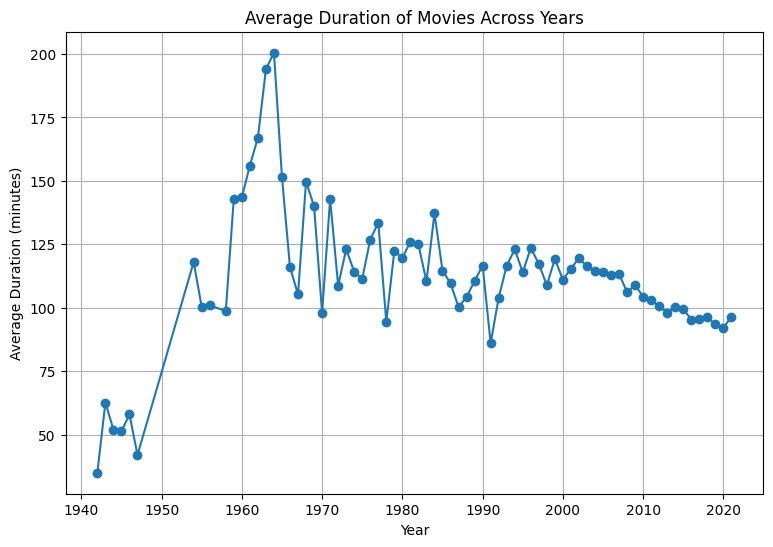

In [50]:
# Ex 2.7: Make a line chart of the average duration of movies (not TV shows) in minutes for every year across all the years. 

# (hint: you can create a new column with the integer value of the minutes of the movies, it's possible to do it with the .apply() 
# method and a lambda function, getting only stripping the minutes of it and converting the digit number to an integer
# or you can also do this process with a for loop over the dataframe rows like <for row_id, row in df.iterrows(): > creating every new value of that row for the new column

# Then use groupby year and in order to average on that movies minutes column)
only_movies_df = movies_df.loc[movies_df['type'] == 'Movie'].copy()

only_movies_df['duration_minutes'] = only_movies_df['duration'].apply(lambda x: int(x.split()[0]))


movies_avg_duration_per_year = only_movies_df.groupby('release_year')['duration_minutes'].mean()  # TDO: movies_avg_duration_per_year has to be a Pandas Series with the average duration of movies per year

fig = plt.figure(figsize=(9, 6))
# TDO: generate the line plot using plt.plot() and the information from movies_avg_duration_per_year (the vertical axis with the minutes value) and its index (the horizontal axis with the years)
plt.plot(movies_avg_duration_per_year.index, movies_avg_duration_per_year, marker='o')
plt.title("Average Duration of Movies Across Years")
plt.xlabel("Year")
plt.ylabel("Average Duration (minutes)")
plt.grid(True)
plt.show()